# HLMA408: Anova

***
> __Auteur__: Joseph Salmon
> <joseph.salmon@umontpellier.fr>

<a id="sommaire"> </a>
## Sommaire

*  __[Introduction et présentation](#intro)__ <br>

<a id="intro"> </a>

# Introduction et présentation

## Import des packages usuels:

In [1]:
import platform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from download import download
import seaborn as sns

## Commande "magique" pour un affichage plus avancé en Jupyter:

In [2]:
%matplotlib inline

## Préparation pour l'affichage graphique et sauvegarder les images:

In [3]:
# saving tools for the course:
sns.set_context("poster", font_scale=1)
sns.set_style("ticks")
sns.set_palette("colorblind")

# colors 
brown = (0.64, 0.16, 0.16)
purple = (148. / 255, 0, 211. / 255)


dirname = "../prebuiltimages/"
imageformat = ".pdf"

## Syndrome Down  et souris génétiquement modiféés: 

Description des données:

"This  dataset  is  found  from
http://www.stat.berkeley.edu/users/statlabs/labs.html. 
It accompanies the excellent text Stat Labs:  Mathematical Statistics through Applications
Springer-Verlag (2001) by Deborah Nolan and Terry Speed."

Plus de détails:
https://www.stat.berkeley.edu/users/statlabs/papers/sample.pdf
(notamment sur les biais de collectes des données...)


Description des variables:

- DNA:  le fragment d'ADN inséré dans la souris ancêtre 1=141G6, 2=152F7, 3=230E8 et 4=285E6
- line: la lignée, e.g. #50-69-29
- tg:   Transgénique (1= Vrai, 0= faux)
- sex:  Sexe de la souris: 1=mâle, 0=femelle
- age: 	 Âge de la souris (en jours) lors de la  pesée
- weight: 	  Poids de la souris (en grammes), arrondi à 0.1 gramme
- cage: 	  Numéro de la cage dans laquelle la souris habitait 

## Téléchargement et import pour sauvegarder les données

In [4]:
# to use the default values of utils for instance
saving = True
path_target = "./utils.py"
url_shared_files = "http://josephsalmon.eu/enseignement/Montpellier/HLMA408/sharedcode/utils.py"
download(url_shared_files, path_target, replace=False)
from utils import my_saving_display

Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.


## Téléchargement et import des données

In [5]:
url = "http://josephsalmon.eu/enseignement/datasets/mouse.data"
# url = "http://www.stat.berkeley.edu/users/statlabs/data/mouse.data" # backup url, without header.
path_target = "./mouse.data"
download(url, path_target, replace=False)

Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.


'./mouse.data'

In [6]:
df_mouse = pd.read_csv("mouse.data", sep='\s+') # \s+ : for hanlding spaces
df_mouse.tail(n=10)  # df stands for Data Frame

,DNA,line,tg,sex,age,weight,cage
522,4,#84-35-72,1,0,119,23.3,97
523,4,#84-35-84,1,0,120,25.5,98
524,4,#84-35-85,1,0,120,25.7,98
525,4,#84-35-86,0,0,120,24.8,98
526,4,#84-35-87,0,0,120,26.6,98
527,4,#84-35-88,0,0,120,26.1,98
528,4,#84-35-89,0,0,120,24.4,98
529,4,#84-35-90,1,0,120,26.1,98
530,4,#84-35-91,0,0,120,26.1,98
531,4,#84-35-92,0,0,120,25.4,98


In [7]:
df_mouse['DNA'] = df_mouse['DNA'] * df_mouse['tg']
df_mouse['DNA'] = df_mouse['DNA'].replace([0, 1, 2, 3, 4], ['no trisomy','141G6','152F7', '230E8', '285E6'])
df_mouse['sex'] = df_mouse['sex'].replace([1,0], ['M','F'])

In [8]:
gp = df_mouse.groupby('sex')
df_male_mouse = gp.get_group(name='M')
df_male_mouse.tail()
df_female_mouse = gp.get_group(name='F')
df_female_mouse.tail()

,DNA,line,tg,sex,age,weight,cage
527,no trisomy,#84-35-88,0,F,120,26.1,98
528,no trisomy,#84-35-89,0,F,120,24.4,98
529,285E6,#84-35-90,1,F,120,26.1,98
530,no trisomy,#84-35-91,0,F,120,26.1,98
531,no trisomy,#84-35-92,0,F,120,25.4,98


/home/jo/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


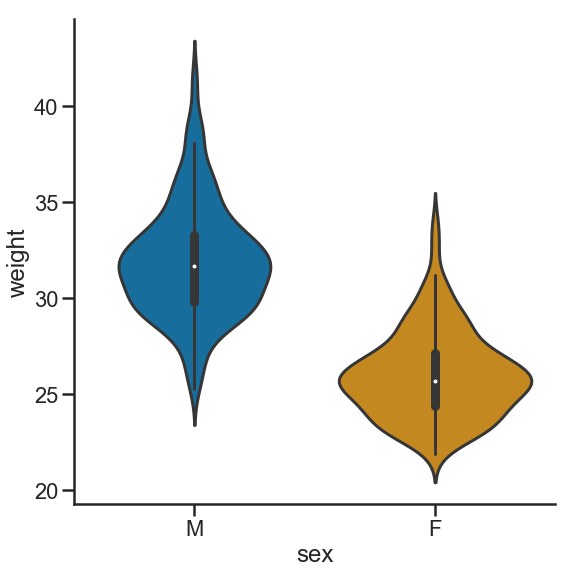

In [9]:
# cf: cmdlinetips.com/2019/03/catplot-in-seaborn-python/
fig = sns.catplot(x='sex',y="weight",data=df_mouse,kind='violin',legend_out=False, height=8.5)
# plt.ylim([-0.4, 0.4])
# sns.despine()
plt.tight_layout()
plt.show()
my_saving_display(fig, dirname,
                  "violin_mouse_by_sex", imageformat, saving=saving)

/home/jo/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


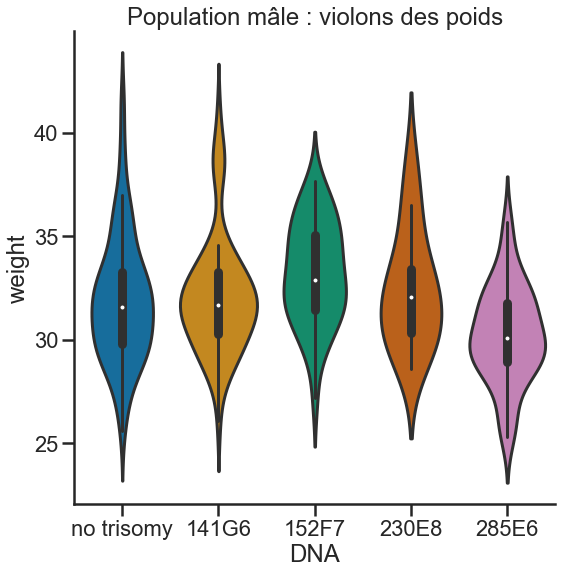

In [31]:
# cf: cmdlinetips.com/2019/03/catplot-in-seaborn-python/
fig = sns.catplot(x='DNA', y="weight", data=df_male_mouse, kind='violin',
                 legend_out=False, order=('no trisomy', '141G6', '152F7', '230E8', '285E6'), height=8.5)
# plt.ylim([-0.4, 0.4])
# sns.despine()
plt.title('Population mâle : violons des poids')
plt.tight_layout()
plt.show()
my_saving_display(fig, dirname,
                  "violin_male_mouse_by_gene", imageformat, saving=saving)

/home/jo/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


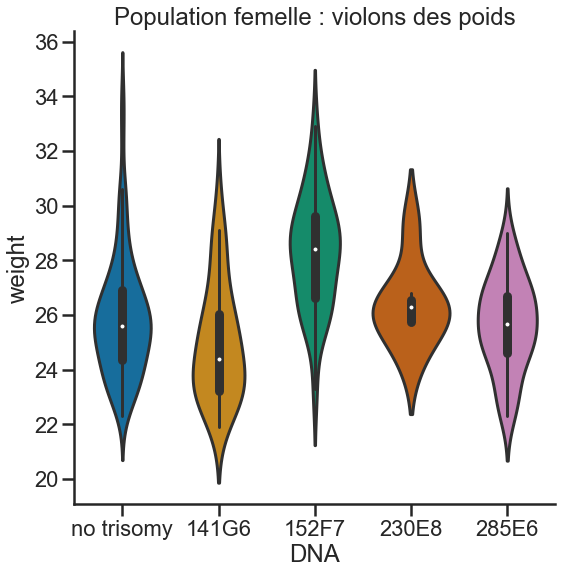

In [11]:
# cf: cmdlinetips.com/2019/03/catplot-in-seaborn-python/
fig = sns.catplot(x='DNA', y="weight", data=df_female_mouse, kind='violin',
                 legend_out=False, order=('no trisomy', '141G6', '152F7', '230E8', '285E6'), height=8.5)
# plt.ylim([-0.4, 0.4])
# sns.despine()
plt.title('Population femelle : violons des poids')
plt.tight_layout()
plt.show()
my_saving_display(fig, dirname,
                  "violin_female_mouse_by_gene", imageformat, saving=saving)

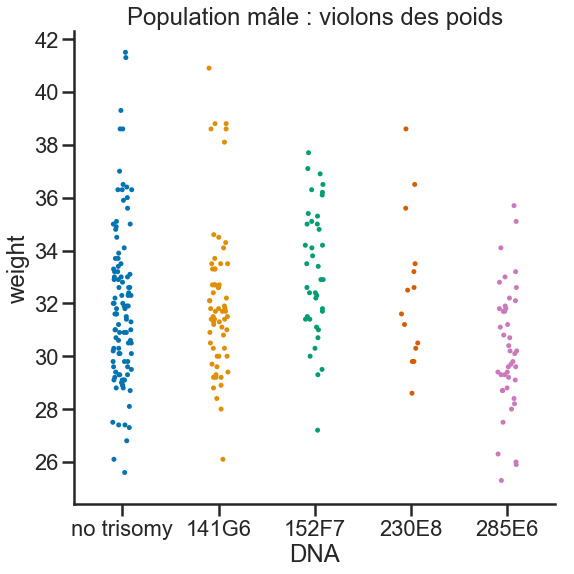

In [12]:
# cf: cmdlinetips.com/2019/03/catplot-in-seaborn-python/
np.random.seed(42)
fig = sns.catplot(x='DNA', y="weight", data=df_male_mouse, jitter='0.1',
                 legend_out=False, order=('no trisomy', '141G6', '152F7', '230E8', '285E6'), height=8.5)

plt.title('Population mâle : violons des poids')
plt.tight_layout()
plt.show()
my_saving_display(fig, dirname,
                  "jitter_male_mouse_by_gene", imageformat, saving=saving)

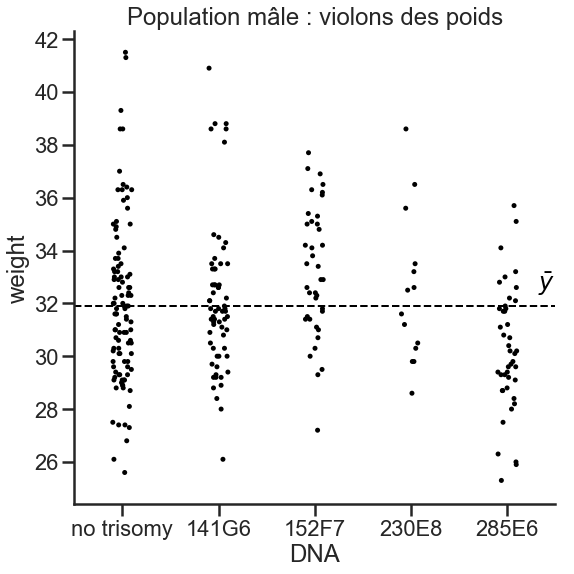

In [28]:
np.random.seed(42)
mean_tot = df_male_mouse['weight'].mean()
fig = sns.catplot(x='DNA', y="weight", data=df_male_mouse, jitter='0.1',color='k',
                 legend_out=False, order=('no trisomy', '141G6', '152F7', '230E8', '285E6'), height=8.5)

centers = [0.1, 0.3, 0.5, 0.7, 0.9]
plt.axhline(y=mean_tot, xmin=0, xmax=1, ls='--', linewidth=2, color = 'k')
plt.text(centers[4] * 5, mean_tot * 1.01, '$\\bar y$', color='k',
         verticalalignment='bottom', horizontalalignment='right')

plt.title('Population mâle : violons des poids')
plt.tight_layout()
plt.show()
my_saving_display(fig, dirname,
                  "jitter_male_mouse_by_gene_mean", imageformat, saving=saving)

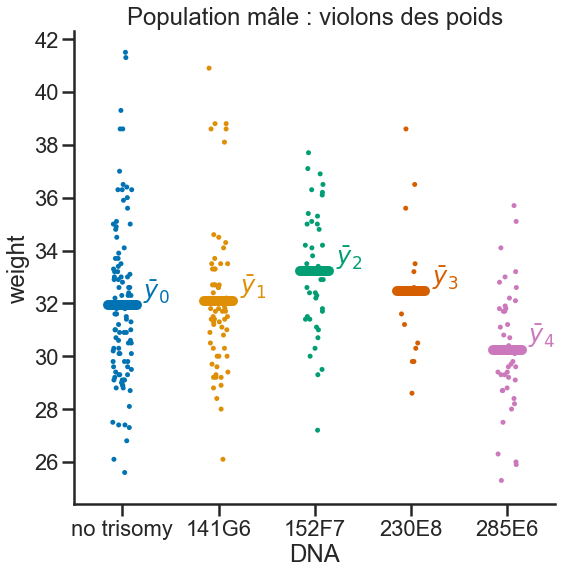

In [32]:
current_palette = sns.color_palette()
list_gene = ['no trisomy', '141G6', '152F7', '230E8', '285E6']
np.random.seed(42)
fig = sns.catplot(x='DNA', y="weight", data=df_male_mouse, jitter='0.1',
                  legend_out=False, order=list_gene, height=8.5)
# plt.axhline(y=mean_tot, xmin=0, xmax=1, ls='--', linewidth=2, color='k')
# plt.text(centers[4] * 5, mean_tot * 1.01, '$\\bar y$', color='k',
#          verticalalignment='bottom', horizontalalignment='right')
plt.title('Population mâle : violons des poids')
delta = 0.03
for i, center in enumerate(centers):
    mean_i = df_male_mouse.groupby('DNA')['weight'].mean()[list_gene[i]]
    plt.axhline(y=mean_i,
                xmin=center - delta, xmax=center + delta, ls='-', linewidth=10, color=current_palette[i])
    plt.text(center * 5, mean_i, '$\\bar y _{}$'.format(i),
             color=current_palette[i], verticalalignment='bottom', horizontalalignment='right',)

plt.tight_layout()

plt.show()

my_saving_display(fig, dirname,
                  "jitter_male_mouse_by_gene_with_means", imageformat, saving=saving)

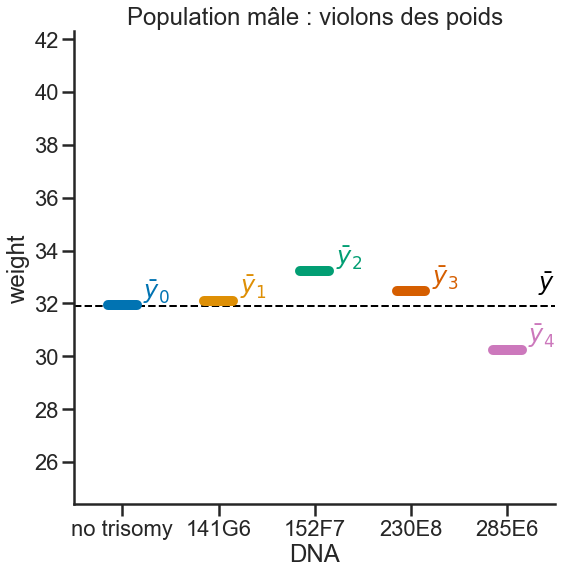

In [33]:
current_palette = sns.color_palette()
list_gene = ['no trisomy', '141G6', '152F7', '230E8', '285E6']
np.random.seed(42)
fig = sns.catplot(x='DNA', y="weight", data=df_male_mouse, jitter='0.1',
                  legend_out=False, order=list_gene, height=8.5,color='w',alpha=0)
plt.axhline(y=mean_tot, xmin=0, xmax=1, ls='--', linewidth=2, color='k')
plt.text(centers[4] * 5, mean_tot * 1.01, '$\\bar y$', color='k',
         verticalalignment='bottom', horizontalalignment='right')
plt.title('Population mâle : violons des poids')
delta = 0.03
for i, center in enumerate(centers):
    mean_i = df_male_mouse.groupby('DNA')['weight'].mean()[list_gene[i]]
    plt.axhline(y=mean_i,
                xmin=center - delta, xmax=center + delta, ls='-', linewidth=10, color=current_palette[i])
    plt.text(center * 5, mean_i, '$\\bar y _{}$'.format(i),
             color=current_palette[i], verticalalignment='bottom', horizontalalignment='right',)

plt.tight_layout()

plt.show()

my_saving_display(fig, dirname,
                  "jitter_male_mouse_by_gene_only_means", imageformat, saving=saving)

In [34]:
mean_tot

In [36]:
df_male_mouse.groupby('DNA')['weight'].mean()

DNA
141G6         32.098437
152F7         33.210256
230E8         32.450000
285E6         30.246512
no trisomy    31.927619
Name: weight, dtype: float64